# RGB IMAGE COMPRESSION WITH DCT

-----------

### Artash Nath, Pay-Elec Team, UTAT

----------------

In [1]:
# Importing Required Libararies
from scipy.fftpack import dct, idct
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt

In [2]:
# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')    

In [3]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [4]:
# Upploading Image
im = imread('rocket.jpg')

DCT = dct2(im)

# Inverse the DCT Coefficients into the Original Image without discarding any information
r_im= idct2(DCT).astype(np.uint8) # Converting RGB values into Integers

In [5]:
print("Original Image Shape :", np.shape(im))
print("DCT Shape :", np.shape(DCT))
print("Reconstructed Image Shape :", np.shape(r_im))

Original Image Shape : (1200, 1200, 3)
DCT Shape : (1200, 1200, 3)
Reconstructed Image Shape : (1200, 1200, 3)


In [6]:
MSE = mse(im, r_im)

In [7]:
MSE

0.20450347222222223

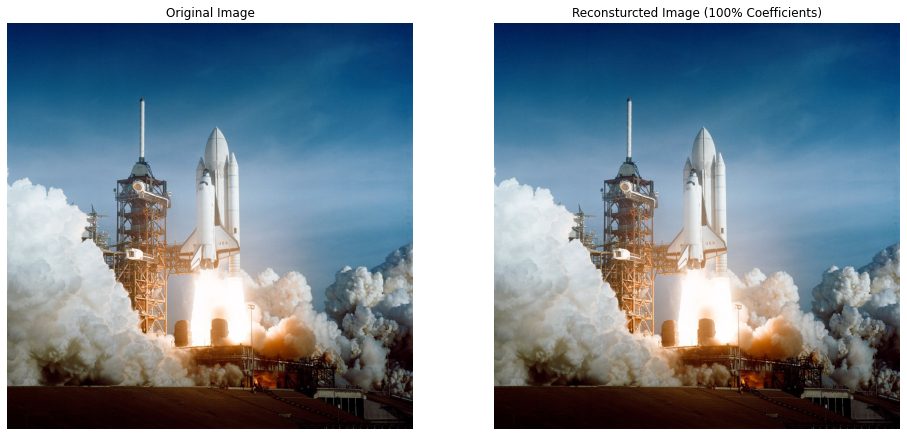

In [8]:
# plot original and reconstructed image (with no lost information)

fig, axs = plt.subplots(1, 2, figsize = (16,8))
axs[0].imshow(im)
axs[0].axis('off')
axs[0].set_title("Original Image")

axs[1].imshow(r_im)
axs[1].axis('off')
axs[1].set_title("Reconsturcted Image (100% Coefficients)")

plt.show()

In [10]:
# Function that takes an image, converts it into DCT Coefficients. Keeping only percentage "thresh" of coefficients
# And reversing kept coefficients back into image

def DCTrecreate(im, thresh, display = False):
    
    DCT =  dct2(im) # Calculates and Creates an array of DCT Coefficients equal to the size of the original image
    thresh2 = np.sort(abs((DCT.ravel())))[int(DCT.size*(1-thresh))] # Determines lowest DCT Coeff values to keep based on "thresh"
    dct_thresh = DCT * (abs(DCT) > (thresh2)) # Removes all DCT Vales lower then determines threshold from DCT Coeff. Array
    P = round((np.sum(abs(DCT) > (thresh2))/im.size)*100, 2) # Re-Calculates threshold of pixels discarded for verification
    r_im = idct2(dct_thresh) # Reverses array of kept DCT Coeffs. Back into a reconstructed image
    r_im =r_im.astype(np.uint8)
    MSE = mse(im, r_im)
    #Display Orginal VS Recreated Image if Display==True
    if display == True:
        fig, axs = plt.subplots(1, 2, figsize = (16,8))
        axs[0].imshow(im)
        axs[0].axis('on')
        axs[0].set_title("Original Image")

        axs[1].imshow(r_im)
        axs[1].axis('off')
        title = "Reconsturcted Image ("+str(P)+"% Coefficients) "+ "| Simmilarity : "+str(int(MSE))
        axs[1].set_title(title)
        plt.show()
        
    #Return recreated image array
    
    
    else:
        return r_im, MSE

In [32]:
thresholds = np.flip(np.array(list(range(1, 100))))

MSEs = []

for i in thresholds:
    MSEs.append((DCTrecreate(im, i/100, display=False))[1])


Text(0.5, 1.0, 'Reconsutrcted Image Quality')

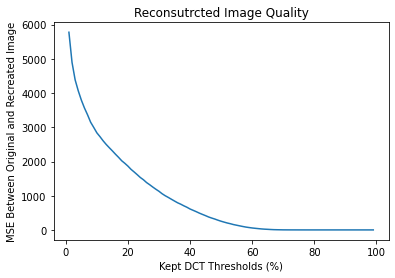

In [34]:
plt.plot(thresholds, MSEs)
plt.xlabel("Kept DCT Thresholds (%)")
plt.ylabel("MSE Between Original and Recreated Image")
plt.title("Reconsutrcted Image Quality")